In [2]:
import numpy as np 
import networkx as nx
import dit
from library import equilibrium_dist, dit_dist, pid_dicts
from itertools import product
import matplotlib.pyplot as plt
from dit.pid import PID_WB
%matplotlib inline 

# Micro-State Boolean Network


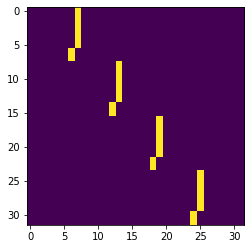

In [13]:
mat_micro = np.zeros((2**5, 2**5))

mat_micro[0][7] = 1
mat_micro[1][7] = 1
mat_micro[2][7] = 1
mat_micro[3][7] = 1
mat_micro[4][7] = 1
mat_micro[5][7] = 1
mat_micro[6][6] = 1
mat_micro[7][6] = 1

mat_micro[8][13] = 1
mat_micro[9][13]  = 1
mat_micro[10][13] = 1
mat_micro[11][13] = 1
mat_micro[12][13] = 1
mat_micro[13][13] = 1
mat_micro[14][12] = 1
mat_micro[15][12] = 1

mat_micro[16][19] = 1
mat_micro[17][19] = 1
mat_micro[18][19] = 1
mat_micro[19][19] = 1
mat_micro[20][19] = 1
mat_micro[21][19] = 1
mat_micro[22][18] = 1
mat_micro[23][18] = 1

mat_micro[24][25] = 1
mat_micro[25][25] = 1
mat_micro[26][25] = 1
mat_micro[27][25] = 1
mat_micro[28][25] = 1
mat_micro[29][25] = 1
mat_micro[30][24] = 1
mat_micro[31][24] = 1
plt.imshow(mat_micro)

states = ["".join(x) for x in product(["0","1"], repeat=int(np.log2(mat_micro.shape[0])))]

0  00000 -> 00111 7
1  00001 -> 00111 7
2  00010 -> 00111 7
3  00011 -> 00111 7
4  00100 -> 00111 7
5  00101 -> 00111 7
6  00110 -> 00110 6
7  00111 -> 00110 6

8  01000 -> 01101 13
9  01001 -> 01101 13
10 01010 -> 01101 13
11 01011 -> 01101 13
12 01100 -> 01101 13
13 01101 -> 01101 13
14 01110 -> 01100 12
15 01111 -> 01100 12

16 10000 -> 10011 19
17 10001 -> 10011 19
18 10010 -> 10011 19
19 10011 -> 10011 19
20 10100 -> 10011 19
21 10101 -> 10011 19
22 10110 -> 10010 18
23 10111 -> 10010 18

24 11000 -> 11001 25
25 11001 -> 11001 25
26 11010 -> 11001 25
27 11011 -> 11001 25
28 11100 -> 11001 25
29 11101 -> 11001 25
30 11110 -> 11000 24
31 11111 -> 11000 24

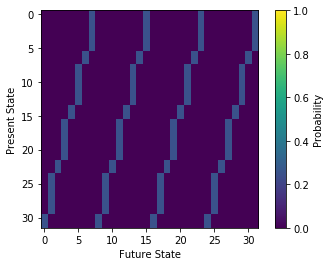

In [4]:
for i in range(mat_micro.shape[0]):
    possible_states = ([int(x,2) for x in states if x[2:] == states[np.where(mat_micro[i] == 1)[0][0]][2:]])
    mat_micro[i][possible_states] = 0.25
    
plt.imshow(mat_micro, vmin=0, vmax=1)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

In [5]:
pi = equilibrium_dist(mat_micro)
print(pi)
print("")
Dist_micro = dit_dist(pi, mat_micro)
print(Dist_micro)

[0.015625 0.046875 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875
 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875
 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875
 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875 0.015625 0.046875]

Class:          Distribution
Alphabet:       (('0', '1'), ('0', '1'), ('0', '1'), ('0', '1'), ('0', '1'), ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f'))
Base:           linear
Outcome Class:  str
Outcome Length: 6
RV Names:       None

x        p(x)
00000H   0.003906249999999999
00000P   0.003906249999999999
00000X   0.003906249999999999
00000f   0.003906249999999999
00001H   0.011718749999999993
00001P   0.011718749999999993
00001X   0.011718749999999993
00001f   0.011718749999999993
00010H   0.0039062499999999944
00010P   0.0039062499999999944
00010X   0.0039062499999999944
00010f  

In [12]:
#imin_micro = PID_WB(Dist_micro)
micro_lattice_order, micro_pid_results = pid_dicts(imin_micro)

bundle = np.array([micro_lattice_order, micro_pid_results], dtype="object")
np.savez_compressed("OR_micro_PID_dicts.npz", bundle)

lattice = imin_micro._lattice._lattice
node_tups = sorted(lattice)
node_strs = [(''.join('{{{}}}'.format(':'.join(map(str, n))) for n in node)) for node in sorted(lattice.nodes)]

mapping = {node_tups[i] : node_strs[i] for i in range(len(node_tups))}
or_macro_lattice = nx.relabel_nodes(lattice, mapping)

nx.write_edgelist(or_macro_lattice,"OR_micro_lattice.edgelist")

# Macro-State Boolean Network

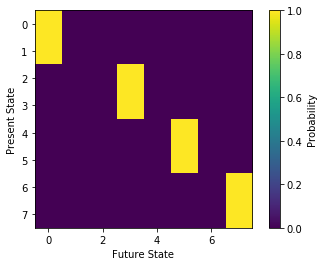

In [7]:
mat_macro = np.zeros((8,8))
mat_macro[0][0] = 1 #000 -> 000
mat_macro[1][0] = 1 #001 -> 000

mat_macro[2][3] = 1 #010 -> 011
mat_macro[3][3] = 1 #011 -> 011

mat_macro[4][5] = 1 #100 -> 101
mat_macro[5][5] = 1 #101 -> 101

mat_macro[6][7] = 1 #110 -> 111
mat_macro[7][7] = 1 #111 -> 111

plt.imshow(mat_macro)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

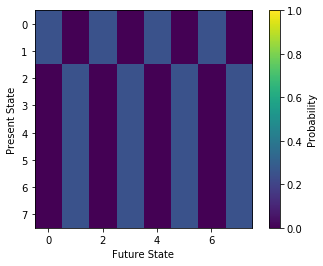

In [8]:
macro_states = ["000","001","010","011","100","101","110","111"]
for i in range(mat_macro.shape[0]):
    possible_states = ([int(x,2) for x in macro_states if x[2:] == macro_states[np.where(mat_macro[i] == 1)[0][0]][2:]])
    mat_macro[i][possible_states] = 0.25
    
plt.imshow(mat_macro, vmin=0, vmax=1)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

In [9]:
pi_macro = pi = equilibrium_dist(mat_macro)
print(pi_macro)
print("")
Dist_macro = dit_dist(pi_macro, mat_macro)
print(Dist_macro)
print("")


[0.0625 0.1875 0.0625 0.1875 0.0625 0.1875 0.0625 0.1875]

Class:          Distribution
Alphabet:       (('0', '1'), ('0', '1'), ('0', '1'), ('0', '1', '2', '3', '4', '5', '6', '7'))
Base:           linear
Outcome Class:  str
Outcome Length: 4
RV Names:       None

x      p(x)
0000   0.015624999999999974
0002   0.015624999999999974
0004   0.015624999999999974
0006   0.015624999999999974
0010   0.04687500000000003
0012   0.04687500000000003
0014   0.04687500000000003
0016   0.04687500000000003
0101   0.015625000000000003
0103   0.015625000000000003
0105   0.015625000000000003
0107   0.015625000000000003
0111   0.046875
0113   0.046875
0115   0.046875
0117   0.046875
1001   0.015625000000000003
1003   0.015625000000000003
1005   0.015625000000000003
1007   0.015625000000000003
1011   0.04687500000000002
1013   0.04687500000000002
1015   0.04687500000000002
1017   0.04687500000000002
1101   0.015624999999999998
1103   0.015624999999999998
1105   0.015624999999999998
1107   0.0156249999999

In [10]:
imin_macro = PID_WB(Dist_macro)
print(imin_macro)

+-----------------+--------+--------+
|      I_min      |  I_r   |   pi   |
+-----------------+--------+--------+
|     {0:1:2}     | 0.8113 | 0.0000 |
|      {0:1}      | 0.8113 | 0.5000 |
|      {0:2}      | 0.3113 | 0.0000 |
|      {1:2}      | 0.3113 | 0.0000 |
|    {0:1}{0:2}   | 0.3113 | 0.0000 |
|    {0:1}{1:2}   | 0.3113 | 0.0000 |
|    {0:2}{1:2}   | 0.3113 | 0.0000 |
| {0:1}{0:2}{1:2} | 0.3113 | 0.0000 |
|       {0}       | 0.3113 | 0.0000 |
|       {1}       | 0.3113 | 0.0000 |
|       {2}       | 0.0000 | 0.0000 |
|     {0}{1:2}    | 0.3113 | 0.0000 |
|     {1}{0:2}    | 0.3113 | 0.0000 |
|     {2}{0:1}    | 0.0000 | 0.0000 |
|      {0}{1}     | 0.3113 | 0.3113 |
|      {0}{2}     | 0.0000 | 0.0000 |
|      {1}{2}     | 0.0000 | 0.0000 |
|    {0}{1}{2}    | 0.0000 | 0.0000 |
+-----------------+--------+--------+


In [11]:
macro_lattice_order, macro_pid_results = pid_dicts(imin_macro)

bundle = np.array([macro_lattice_order, macro_pid_results], dtype="object")
np.savez_compressed("OR_macro_PID_dicts.npz", bundle)

lattice = imin_macro._lattice._lattice
node_tups = sorted(lattice)
node_strs = [(''.join('{{{}}}'.format(':'.join(map(str, n))) for n in node)) for node in sorted(lattice.nodes)]

mapping = {node_tups[i] : node_strs[i] for i in range(len(node_tups))}
or_macro_lattice = nx.relabel_nodes(lattice, mapping)

nx.write_edgelist(or_macro_lattice,"OR_macro_lattice.edgelist")